#Case Study: House Price

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:

- Size: The size of the house
- Bedrooms: The number of bedrooms in the house
- Bathrooms: The number of bathrooms in the house
- Location: A feature representing the location of the house
- YearBuilt: The year the house was built
- RoofType: The type of roof on the house
- Price: The price of the house

## Load and Explore the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_prices_dataset.csv')
df

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087712


Let's explore the dataset to better know what we're dealing with

In [3]:
# Question 1:

# Get the shape of the dataset
df.shape

# Check the data types of the columns
  # We can check the data types of the columns by using -dtypes- and -info()-
df.dtypes

Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object

## Deeper Exploration

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2:

# Check for missing values
print("Missing values:\n", df.isnull().any(),'\n')

print("Sum of Missing values:", df.isnull().sum().sum(),'\n')

# Drop rows with NaN values
df.dropna(inplace = True)

# Check for missing values again
print("After Droping the Missing values:\n", df.isnull().sum(),'\n')

Missing values:
 Size          True
Bedrooms      True
Bathrooms    False
Location     False
YearBuilt    False
RoofType     False
Price        False
dtype: bool 

Sum of Missing values: 300 

After Droping the Missing values:
 Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64 



This function sns.pairplot() creates scatter plots for each numerical feature (Size, Bedrooms, Bathrooms, Location, YearBuilt) against the target variable (Price).

<ipython-input-5-477840765c32>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Price, bins=50, kde=True, )


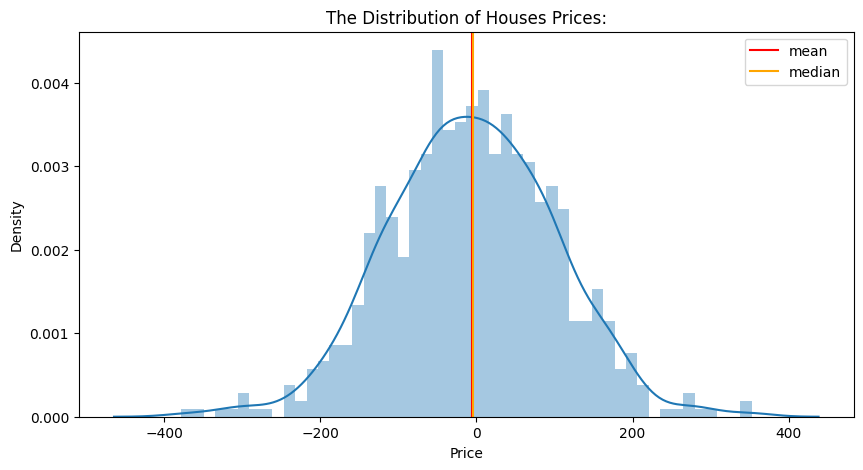

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Question 3:

# Create plots to better understand the data
fig = plt.figure(figsize = (10, 5))
ax = sns.distplot(df.Price, bins=50, kde=True, )
plt.axvline(x=np.mean(df.Price), color='red', label='mean')
plt.axvline(x=np.median(df.Price), color='orange',label='median')
plt.title('The Distribution of Houses Prices:')
plt.legend(loc='upper right')
plt.show()


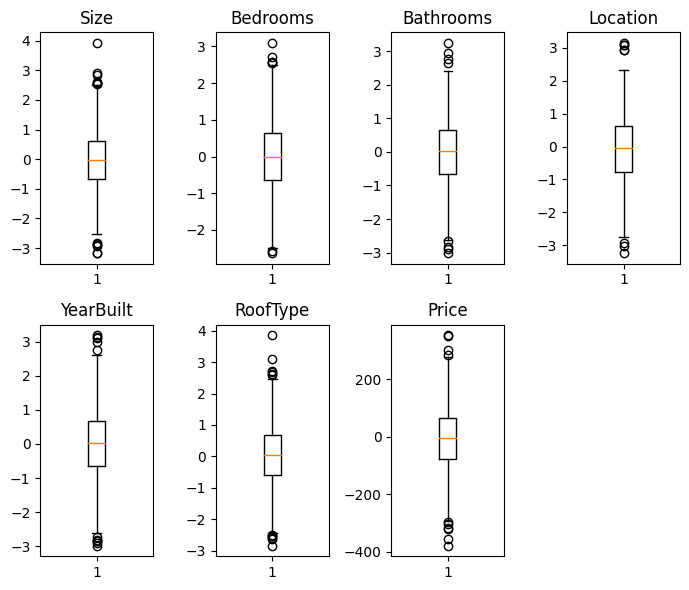

In [6]:
#Visualization of the Outliers in Each Columns
plt.figure(figsize=(7,6))
for i ,c in enumerate(df):
  plt.subplot(2,4,i+1)
  plt.boxplot(df[c])
  plt.title(c)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

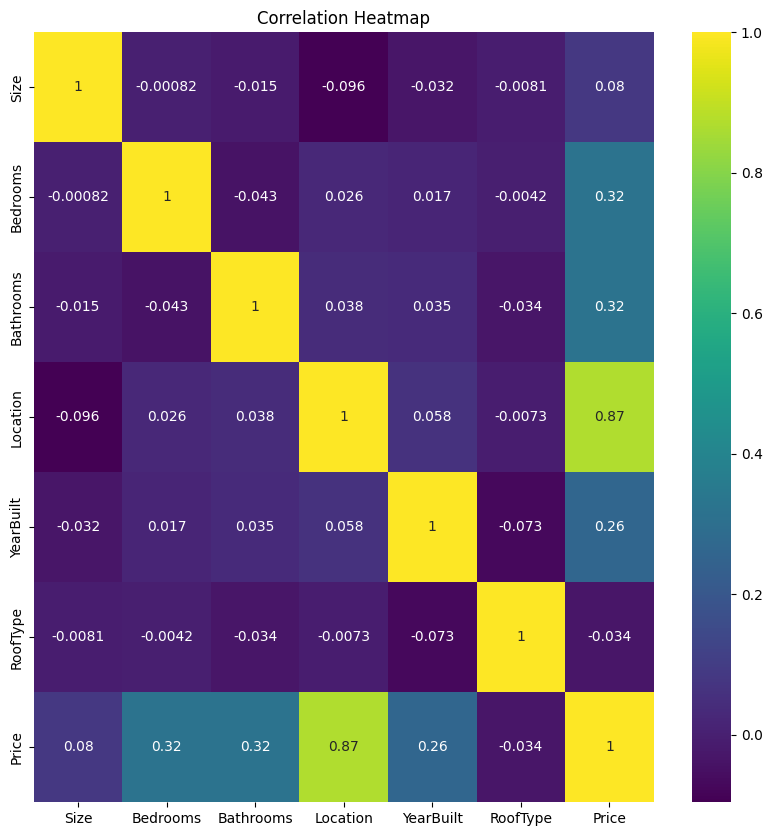

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), cmap='viridis', annot=True)

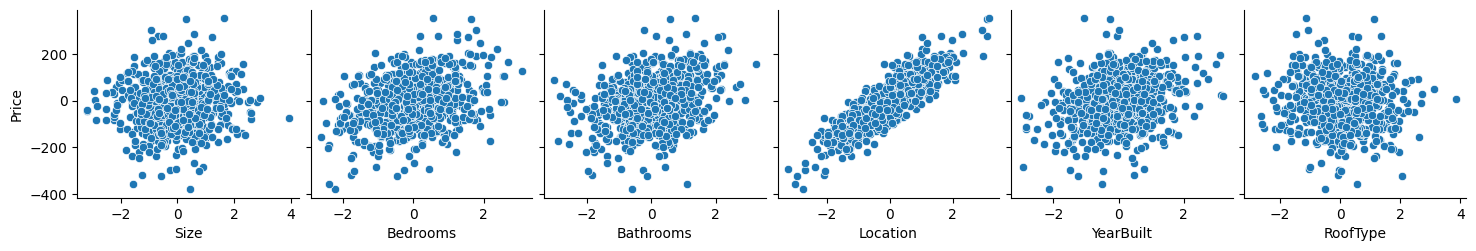

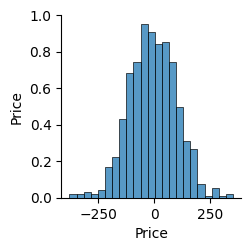

In [8]:
# The Pairwise Relationship in Dataset
for i in range(0, len(df.columns), 6):
  sns.pairplot(df, x_vars = df.columns[i:i+6], y_vars = ['Price'])

## Predictive Modeling using Linear Regression

- Split the Data
- Train a Linear Regressor
- Evaluate it on the test set using any metric of your choice

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Question 4:
# Split the data into features (X) and target variable (y)
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Question 5:
# Evaluate the model on the test set
pred = lr.predict(xtest)

# Calculate evaluation metrics
r2_score = r2_score(ytest, pred)
MSE = mean_squared_error(ytest, pred)
MAE = mean_absolute_error(ytest, pred)

# Print the evaluation metrics
print(f'The Evaluations Scores:\nR2 score : {r2_score}\nMean squared error : {MSE}\nMean absolute error : {MAE}')

The Evaluations Scores:
R2 score : 0.9999788915641026
Mean squared error : 0.24566225870757297
Mean absolute error : 0.3948286555359066


## Predictive Modeling using Logistic Regression

To utilize the same dataset for logistic regression, you need to transform the problem into a classification task. For example, you can introduce a threshold and classify the houses as "expensive" or "affordable" based on whether their prices are above or below the threshold. You can choose the threshold based on your dataset or specific requirements.

Convert the target variable into a binary variable (0 or 1) representing the classes (e.g., 0 for affordable, 1 for expensive). Then, train a logistic regression model using the same features to classify houses as either affordable or expensive based on the chosen threshold.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Question 6:

# Set the median as a threshold to classify houses as "expensive" or "affordable"
threshold = df['Price'].median()

# Transform the problem into a classification task
df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)
df2 = df.drop("Price", axis=1)

# Split the data into features (X) and target variable (y)
x2 = df2.drop("Class", axis=1)
y2 = df2['Class']

# Split the data into training and testing sets
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Fit a logistic regression model
classifier = LogisticRegression()
classifier.fit(xtrain2, ytrain2)

# Make predictions on the test set
ypred = classifier.predict(xtest2)

# Calculate evaluation metrics
accuracy = accuracy_score(ytest2, ypred)
precision = precision_score(ytest2, ypred)
recall = recall_score(ytest2, ypred)
f1 = f1_score(ytest2, ypred)


# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Evaluation Metrics:
Accuracy: 0.9861111111111112
Precision: 0.9864864864864865
Recall: 0.9864864864864865
F1 score: 0.9864864864864865


In [12]:
# We can see the evaluation metrics scores using the classification report
print(classification_report(ytest2,ypred.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      0.99      0.99        74

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



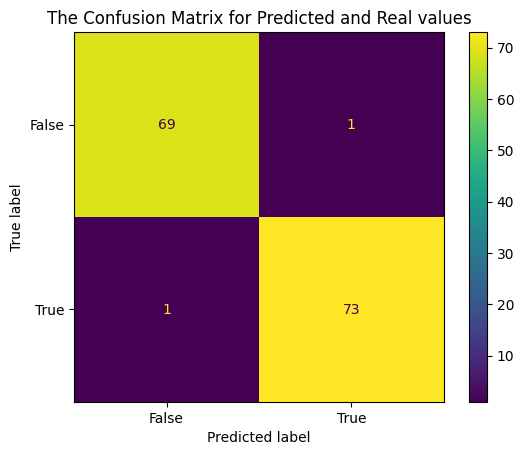

In [13]:
confusion_matrix = confusion_matrix(ytest2, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('The Confusion Matrix for Predicted and Real values')
plt.show()